In [28]:
import os 

from src.problem import MultiODProblem
from src.solution import MultiODSolution
from src.utils import read_instance_data

In [51]:
instance_dir = os.path.join('data', 'tsppdlib', 'instances', 'grubhub')

In [52]:
instances = [i for i in os.listdir(instance_dir) if i.endswith('.tsp')]

In [53]:
instance = os.path.join(instance_dir, 'grubhub-02-0.tsp')

In [54]:
locations = read_instance_data(instance)

In [55]:
p = MultiODProblem(locations=locations)

In [7]:
from src.gurobi.gurobi_formulation import formulation
from src.gurobi.utils import display_gurobi_result

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 45 rows, 42 columns and 166 nonzeros
Model fingerprint: 0x492d448a
Variable types: 6 continuous, 36 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e+02, 1e+03]
  Bounds range     [1e+00, 6e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 25 rows and 19 columns
Presolve time: 0.00s
Presolved: 20 rows, 23 columns, 72 nonzeros
Variable types: 4 continuous, 19 integer (19 binary)


Found heuristic solution: objective 2769.8632336
Found heuristic solution: objective 2443.2508941

Root relaxation: cutoff, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0      2443.25089 2443.25089  0.00%     -    0s

Explored 1 nodes (10 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 2 (of 2 available processors)

Solution count 2: 2443.25 2769.86 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.443250894054e+03, best bound 2.443250894054e+03, gap 0.0000%


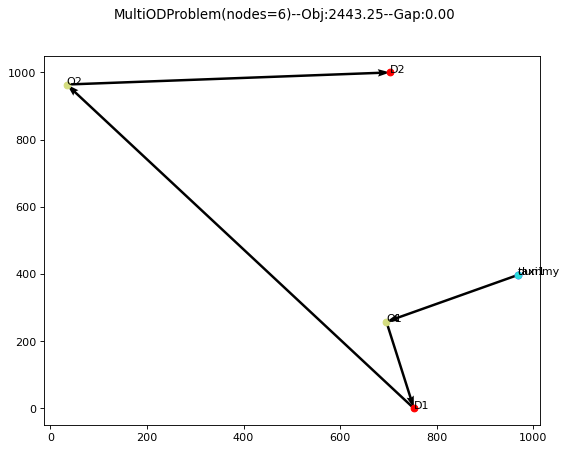

In [56]:
X, m = formulation(p, '2D')
m.optimize()
fig = display_gurobi_result(X, m, p)

In [36]:
lkh_path = [[0,1,4,5,2,3,0]]
lkh_sol = MultiODSolution(lkh_path, p)
p.calc_cost(lkh_sol)

1856.8068691864578

In [37]:
p.is_feasible(lkh_sol)

False

In [34]:
from src.utils import display_result

In [42]:
p.locations[3]

array([557., 736.])

In [43]:
p.locations[0]

array([224., 358.])

In [47]:
import numpy as np

In [50]:
np.sum(np.sqrt((p.locations[4] - p.locations[0])**2))

755.0

In [49]:
711+1856.81

2567.81

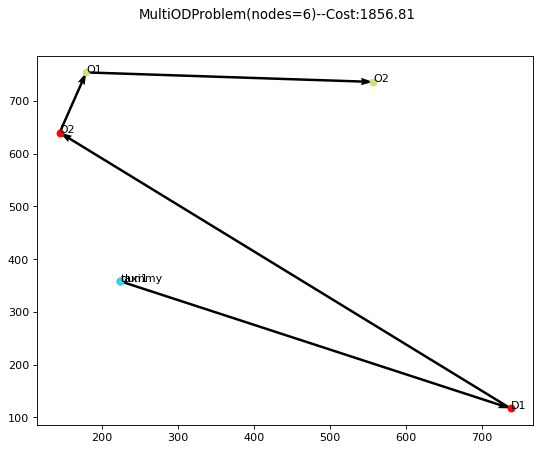

In [39]:
fig = display_result(p, lkh_sol)